In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
any_null = df.isnull().any()
print(any_null)

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool


In [ ]:
label_encoder = LabelEncoder()
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,4,25.19,6.6,140,0
1,Female,54.0,0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,4,27.32,5.7,158,0
3,Female,36.0,0,0,1,23.45,5.0,155,0
4,Male,76.0,1,1,1,20.14,4.8,155,0
5,Female,20.0,0,0,4,27.32,6.6,85,0
6,Female,44.0,0,0,4,19.31,6.5,200,1
7,Female,79.0,0,0,0,23.86,5.7,85,0
8,Male,42.0,0,0,4,33.64,4.8,145,0
9,Female,32.0,0,0,4,27.32,5.0,100,0


In [ ]:

df['gender'] = label_encoder.fit_transform(df['gender'])
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,0.177171,0.563636,0.272727,0
1,0,54.0,0,0,0,0.202031,0.563636,0.000000,0
2,1,28.0,0,0,4,0.202031,0.400000,0.354545,0
3,0,36.0,0,0,1,0.156863,0.272727,0.340909,0
4,1,76.0,1,1,1,0.118231,0.236364,0.340909,0
5,0,20.0,0,0,4,0.202031,0.563636,0.022727,0
6,0,44.0,0,0,4,0.108543,0.545455,0.545455,1
7,0,79.0,0,0,0,0.161648,0.400000,0.022727,0
8,1,42.0,0,0,4,0.275794,0.236364,0.295455,0
9,0,32.0,0,0,4,0.202031,0.272727,0.090909,0


In [ ]:
scaler = MinMaxScaler()

# Specify columns to scale
columns_to_scale = ['bmi','HbA1c_level', 'blood_glucose_level']


df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled DataFrame
print(df)

       gender   age  hypertension  heart_disease  smoking_history       bmi  \
0           0  80.0             0              1                4  0.177171   
1           0  54.0             0              0                0  0.202031   
2           1  28.0             0              0                4  0.202031   
3           0  36.0             0              0                1  0.156863   
4           1  76.0             1              1                1  0.118231   
...       ...   ...           ...            ...              ...       ...   
99995       0  80.0             0              0                0  0.202031   
99996       0   2.0             0              0                0  0.085901   
99997       1  66.0             0              0                3  0.207983   
99998       0  24.0             0              0                4  0.296569   
99999       0  57.0             0              0                1  0.144958   

       HbA1c_level  blood_glucose_level  diabetes  

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

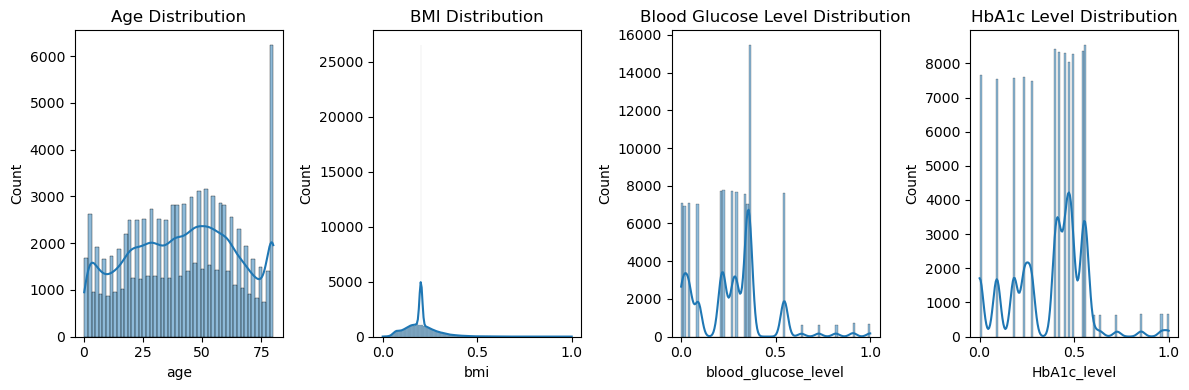

In [ ]:


# Distribution plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 4, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')

plt.subplot(1, 4, 3)
sns.histplot(df['blood_glucose_level'], kde=True)
plt.title('Blood Glucose Level Distribution')


plt.subplot(1, 4, 4)
sns.histplot(df['HbA1c_level'], kde=True)
plt.title('HbA1c Level Distribution')


plt.tight_layout()
plt.show()



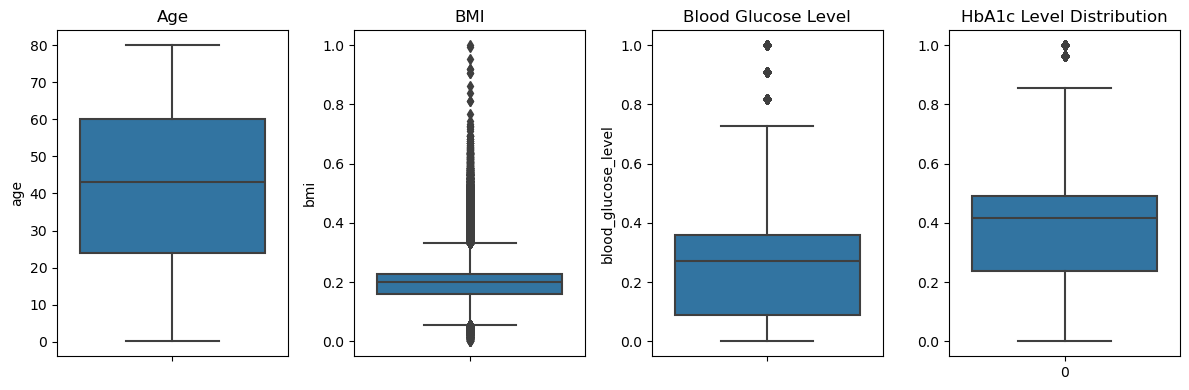

In [ ]:
# Box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
sns.boxplot(y=df['age'])
plt.title('Age')

plt.subplot(1, 4, 2)
sns.boxplot(y=df['bmi'])
plt.title('BMI')

plt.subplot(1, 4, 3)
sns.boxplot(y=df['blood_glucose_level'])
plt.title('Blood Glucose Level')

plt.subplot(1, 4, 4)
sns.boxplot(df['HbA1c_level'])
plt.title('HbA1c Level Distribution')

plt.tight_layout()
plt.show()

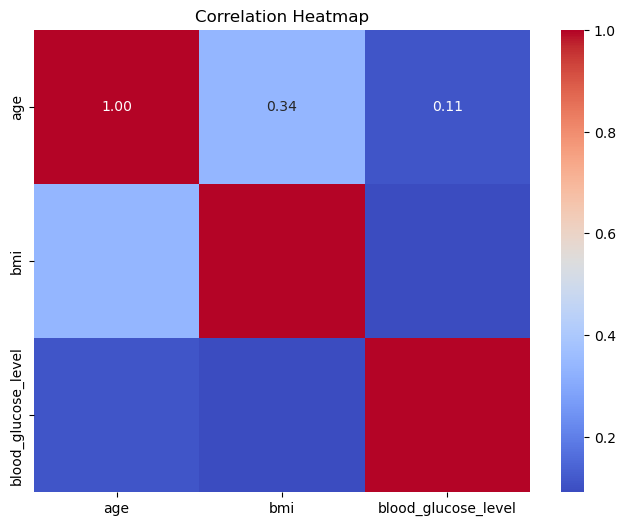

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'bmi', 'blood_glucose_level']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']
print(X)
print(y)

       gender   age  hypertension  heart_disease  smoking_history       bmi  \
0           0  80.0             0              1                4  0.177171   
1           0  54.0             0              0                0  0.202031   
2           1  28.0             0              0                4  0.202031   
3           0  36.0             0              0                1  0.156863   
4           1  76.0             1              1                1  0.118231   
...       ...   ...           ...            ...              ...       ...   
99995       0  80.0             0              0                0  0.202031   
99996       0   2.0             0              0                0  0.085901   
99997       1  66.0             0              0                3  0.207983   
99998       0  24.0             0              0                4  0.296569   
99999       0  57.0             0              0                1  0.144958   

       HbA1c_level  blood_glucose_level  
0        

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
feature_importances = dt_model.feature_importances_
print(feature_importances)

[0.01216738 0.0644715  0.00553593 0.00439488 0.02680303 0.12460471
 0.4974612  0.26456138]


In [ ]:
accuracy = dt_model.score(X_test, y_test)
print("Accuracy Score before feature selection: ",accuracy)

Accuracy Score before feature selection:  0.9530666666666666


In [ ]:
from sklearn.metrics import accuracy_score
dt_model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model_entropy.fit(X_train, y_train)

# Evaluate Decision Tree model using Entropy
y_pred_entropy = dt_model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy using Entropy:", accuracy_entropy)

# Train Decision Tree model using Gini-index
dt_model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model_gini.fit(X_train, y_train)

# Evaluate Decision Tree model using Gini-index
y_pred_gini = dt_model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Accuracy using Gini-index:", accuracy_gini)

Accuracy using Entropy: 0.9542333333333334
Accuracy using Gini-index: 0.9530666666666666


In [ ]:
top_k = 3
top_features_indices = feature_importances.argsort()[-top_k:][::-1]

# Get names of top features
top_features_names = X.columns[top_features_indices]

print("Top", top_k, "features:", top_features_names)

# Rebuild model with selected features
X_train_selected = X_train.iloc[:, top_features_indices]
X_test_selected = X_test.iloc[:, top_features_indices]

# Retrain the model using selected features
dt_model_selected = DecisionTreeClassifier(random_state=42)
dt_model_selected.fit(X_train_selected, y_train)

# Evaluate the model
accuracy = dt_model_selected.score(X_test_selected, y_test)
print("Accuracy with selected features:", accuracy)

Top 3 features: Index(['HbA1c_level', 'blood_glucose_level', 'bmi'], dtype='object')
Accuracy with selected features: 0.9551666666666667


In [ ]:
dt_model_entropy_sel = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model_entropy_sel.fit(X_train_selected, y_train)

# Evaluate Decision Tree model using Entropy
y_pred_entropy = dt_model_entropy_sel.predict(X_test_selected)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy using Entropy:", accuracy_entropy)



Accuracy using Entropy: 0.9555666666666667


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

k = 3  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get names of top features
top_features_names = X.columns[selected_feature_indices]
print("Top", k, "features selected by SelectKBest:", top_features_names)

# Train a decision tree model using the selected features
dt_model_selected = DecisionTreeClassifier(random_state=42)
dt_model_selected.fit(X_train_selected, y_train)

# Evaluate the model
accuracy = dt_model_selected.score(X_test_selected, y_test)
print("Accuracy with selected features:", accuracy)

In [ ]:
fig  =  plt.figure(figsize=(20,15))
tree.plot_tree(dt_model_entropy);